<a href="https://colab.research.google.com/github/jburchfield76/datasharing/blob/master/Lasso_Ridge_Reg_Visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Generate synthetic data (or load real data)
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(18, 70, 100),
    'salary': np.random.randint(30000, 120000, 100),
    'churn': np.random.choice([0, 1], 100)  # 0 = No churn, 1 = Churn
})

# Features and target
X = data[['age', 'salary']]
y = data['churn']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Different values of C to test
C_values = [0.01, 0.1, 1, 10, 100]

# Store results for L1 (Lasso) and L2 (Ridge)
results_l1 = {}
results_l2 = {}

for C in C_values:
    # L1 (Lasso) Logistic Regression
    l1_model = LogisticRegression(penalty='l1', solver='liblinear', C=C)  # L1 requires 'liblinear' solver
    l1_scores = cross_val_score(l1_model, X, y, cv=10)
    results_l1[C] = l1_scores.mean()

    # L2 (Ridge) Logistic Regression
    l2_model = LogisticRegression(penalty='l2', C=C)
    l2_scores = cross_val_score(l2_model, X, y, cv=10)
    results_l2[C] = l2_scores.mean()

# Print results for L1 and L2
print("\nL1 (Lasso) Regularization Results:")
for C, accuracy in results_l1.items():
    print(f"C={C}: Mean Accuracy = {accuracy:.4f}")

print("\nL2 (Ridge) Regularization Results:")
for C, accuracy in results_l2.items():
    print(f"C={C}: Mean Accuracy = {accuracy:.4f}")


Accuracy: 0.23333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.33      0.21         9
           1       0.40      0.19      0.26        21

    accuracy                           0.23        30
   macro avg       0.28      0.26      0.23        30
weighted avg       0.33      0.23      0.24        30


L1 (Lasso) Regularization Results:
C=0.01: Mean Accuracy = 0.5200
C=0.1: Mean Accuracy = 0.4900
C=1: Mean Accuracy = 0.4800
C=10: Mean Accuracy = 0.4500
C=100: Mean Accuracy = 0.4600

L2 (Ridge) Regularization Results:
C=0.01: Mean Accuracy = 0.4300
C=0.1: Mean Accuracy = 0.4400
C=1: Mean Accuracy = 0.4400
C=10: Mean Accuracy = 0.4400
C=100: Mean Accuracy = 0.4400


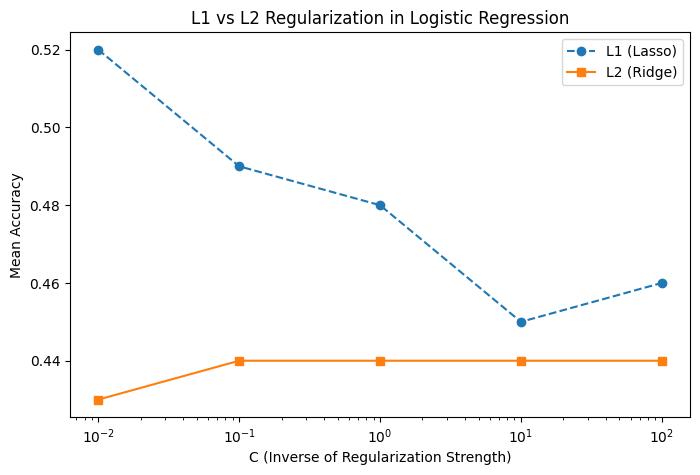

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(C_values, list(results_l1.values()), marker='o', linestyle='--', label="L1 (Lasso)")
plt.plot(C_values, list(results_l2.values()), marker='s', linestyle='-', label="L2 (Ridge)")
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Mean Accuracy")
plt.title("L1 vs L2 Regularization in Logistic Regression")
plt.legend()
plt.show()
